## Reading in environmental data files with Pandas

Let's read in a few example data files. 

### 1) CSV: Santa Barbara station precipitation
First, take the CSV-formatted file "wxstation_UCSB_NCDC.csv":

In [3]:
# Import the pandas package
import pandas as pd

# Read in data file into a Pandas data frame
dat = pd.read_csv('wxstation_UCSB_NCDC.csv') 

In [6]:
# Display type of data to confirm
type(dat)

pandas.core.frame.DataFrame

In [7]:
# Display header information for data frame
dat.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00053152,"SANTA BARBARA 11 W, CA US",8/14/08,0.0,NaN,NaN
1,USW00053152,"SANTA BARBARA 11 W, CA US",8/15/08,0.0,73.0,62.0
2,USW00053152,"SANTA BARBARA 11 W, CA US",8/16/08,0.0,71.0,61.0
3,USW00053152,"SANTA BARBARA 11 W, CA US",8/17/08,0.0,71.0,60.0
4,USW00053152,"SANTA BARBARA 11 W, CA US",8/18/08,0.0,71.0,59.0


In [9]:
# Display column titles
dat.columns

Index(['STATION', 'NAME', 'DATE', 'PRCP', 'TMAX', 'TMIN'], dtype='object')

(0.0, 6.0)

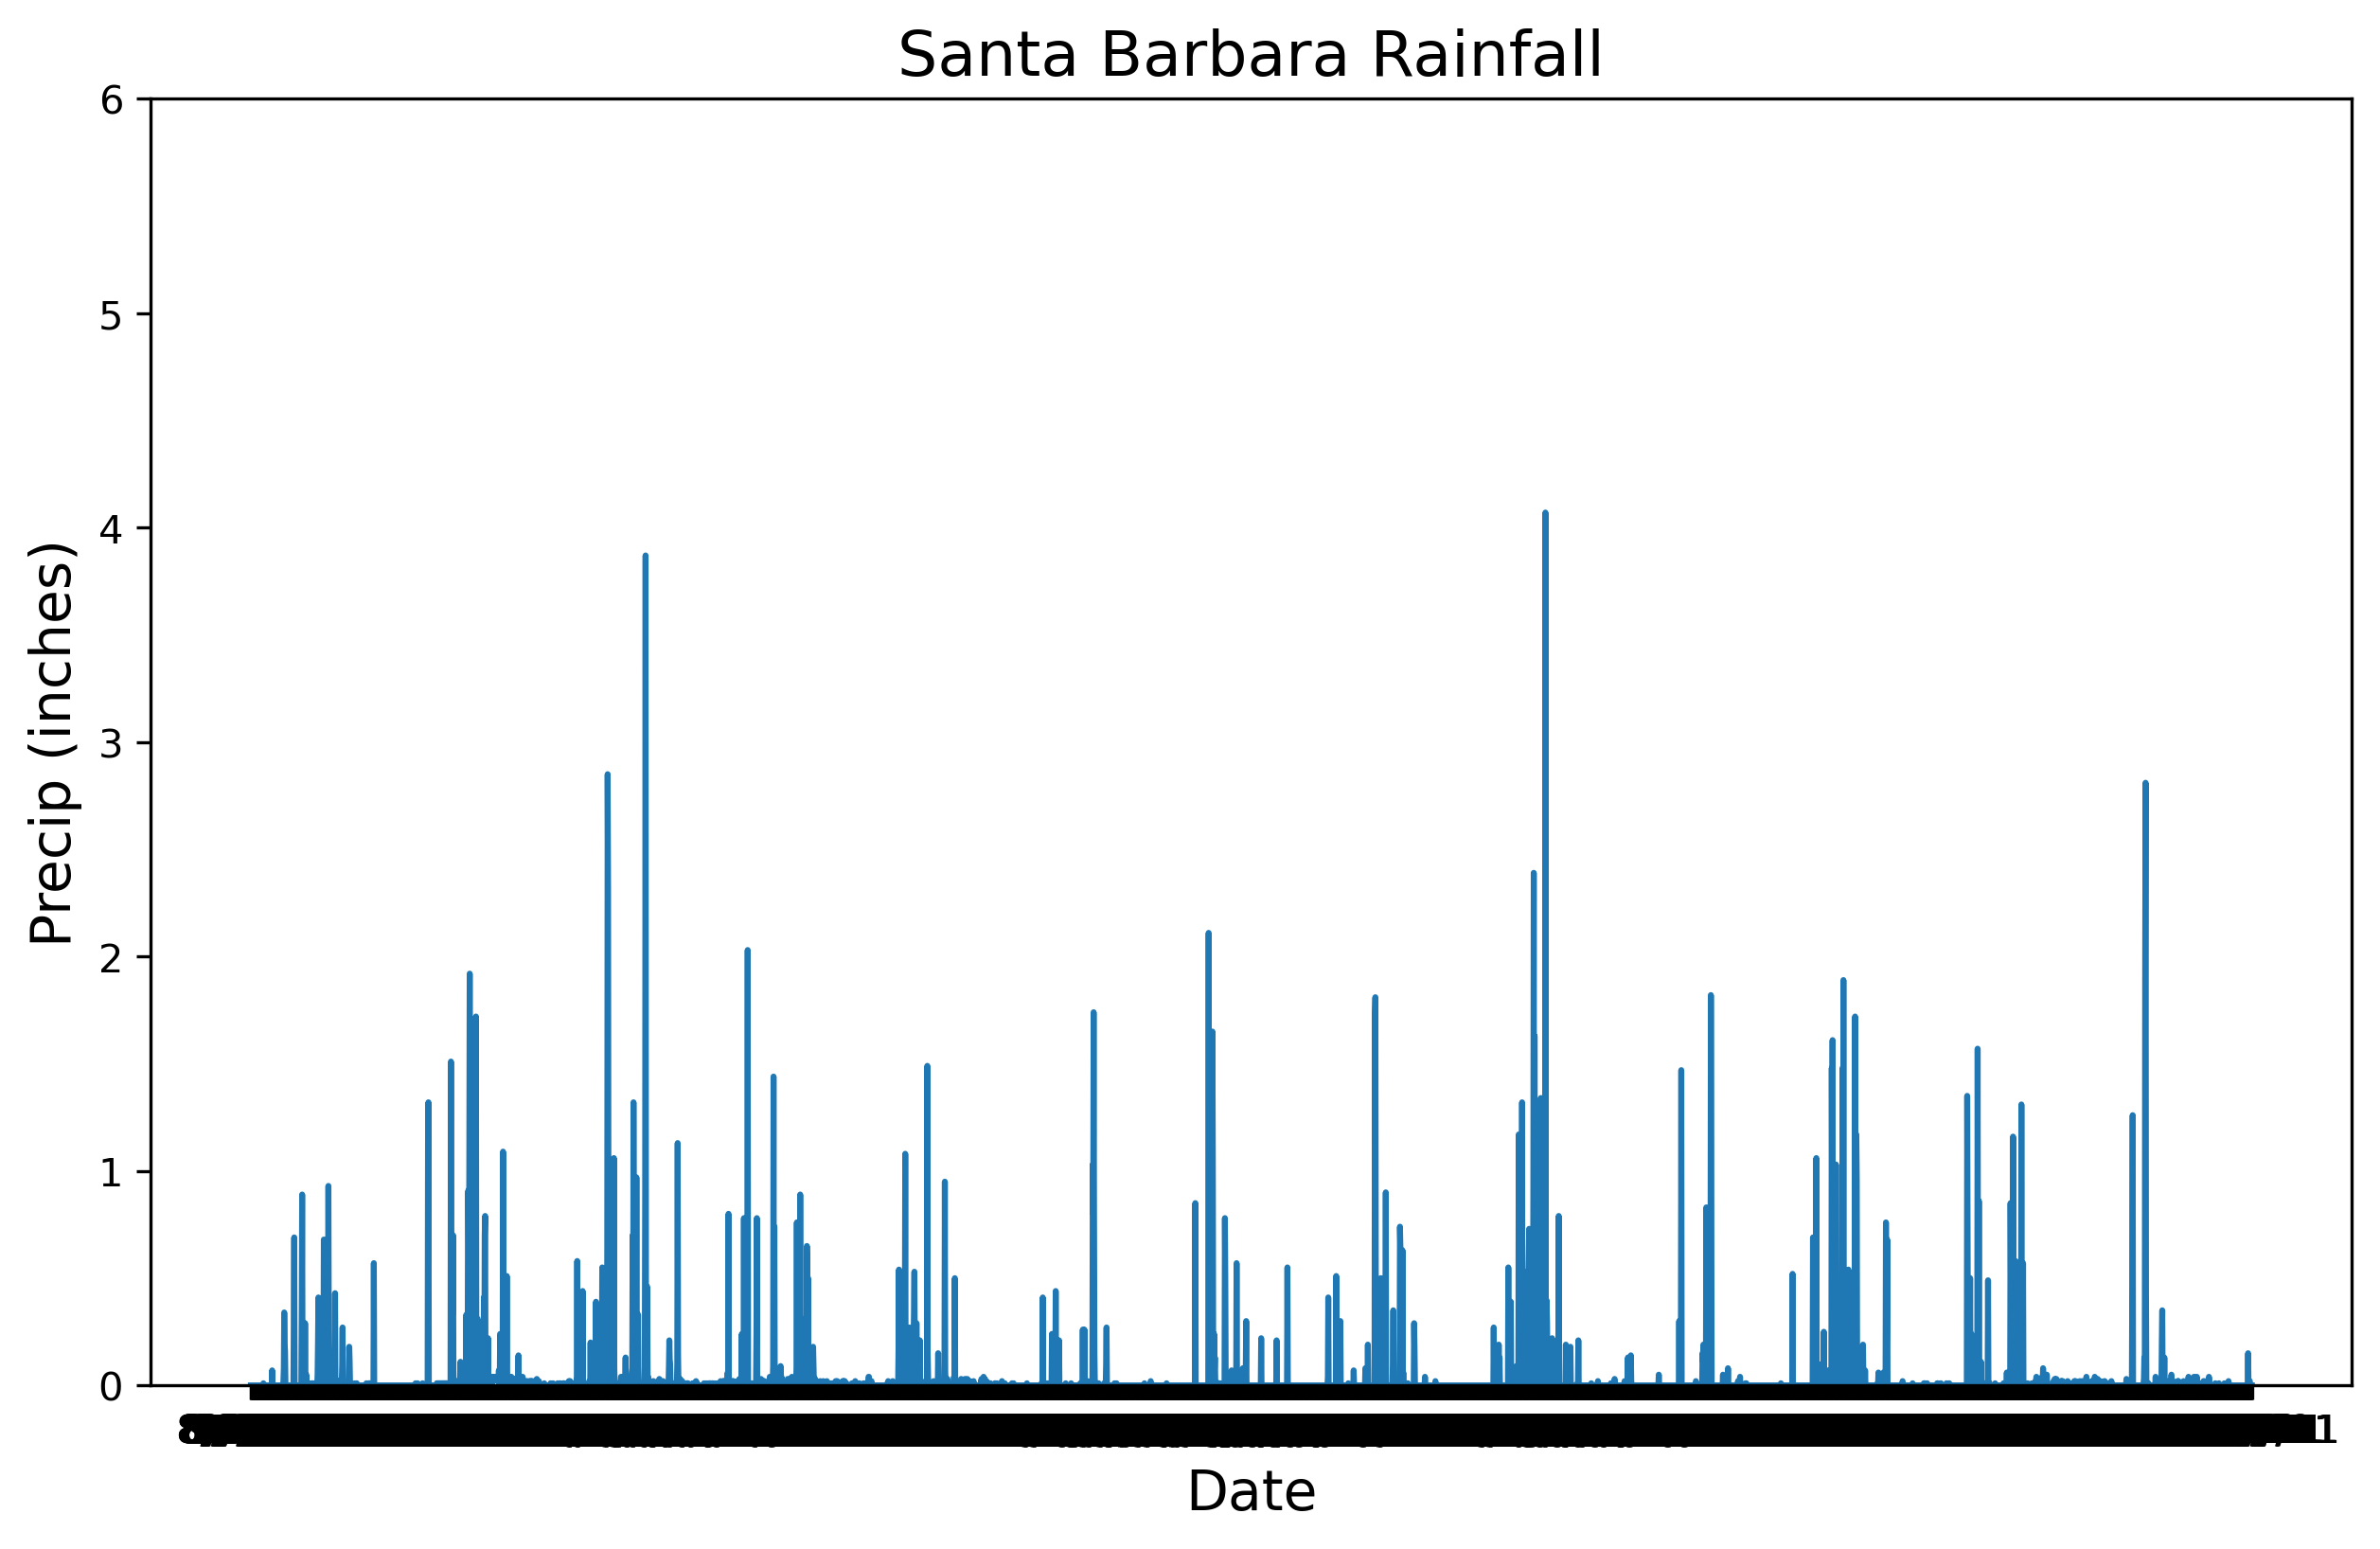

In [13]:
# Make a basic time series plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(dat['DATE'],dat['PRCP'])   # add data to the plot
plt.title('Santa Barbara Rainfall', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Precip (inches)', fontsize=14)
plt.ylim(0, 6)


### 2) netCDF: NOAA Ocean Acidification Program buoy

As our second example, let's look at a netCDF-formatted dataset. We'll stick to one-dimensional data for now: the NOAA Ocean Acidification Program has lots of cool time series of various things.

In [17]:
import xarray as xr

In [18]:
obs_n34=xr.open_dataset('OS_CCE1_12_D_CTD.nc')

In [19]:
print(obs_n34)

<xarray.Dataset>
Dimensions:                   (TIME: 8609, LATITUDE: 1, LONGITUDE: 1, DEPTH: 13, DUMMYCHARLENGTH: 103)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2018-11-12T15:00:00 ... 2...
  * LATITUDE                  (LATITUDE) float64 33.48
  * LONGITUDE                 (LONGITUDE) float64 -122.5
  * DEPTH                     (DEPTH) float64 9.0 19.0 ... 2.214e+03 3.948e+03
Dimensions without coordinates: DUMMYCHARLENGTH
Data variables:
    TEMP                      (DEPTH, TIME) float32 ...
    TEMP_QC                   (DEPTH, TIME) float32 ...
    CNDC                      (DEPTH, TIME) float32 ...
    CNDC_QC                   (DEPTH, TIME) float32 ...
    PRES                      (DEPTH, TIME) float32 ...
    PRES_QC                   (DEPTH, TIME) float32 ...
    PSAL                      (DEPTH, TIME) float32 ...
    PSAL_QC                   (DEPTH, TIME) float32 ...
    INSTRUMENT_SERIAL_NUMBER  (DEPTH) float64 ...
    INSTRUMENT_MAKE_MODEL     (DU

In [20]:
temp=obs_n34['TEMP']

In [21]:
print(temp)

<xarray.DataArray 'TEMP' (DEPTH: 13, TIME: 8609)>
[111917 values with dtype=float32]
Coordinates:
  * TIME     (TIME) datetime64[ns] 2018-11-12T15:00:00 ... 2019-05-10T22:59:5...
  * DEPTH    (DEPTH) float64 9.0 19.0 29.0 ... 1.002e+03 2.214e+03 3.948e+03
Attributes:
    standard_name:        sea_water_temperature
    units:                degree_Celsius
    long_name:            sea water temperature
    valid_min:            -2.0
    valid_max:            40.0
    ancillary_variables:  TEMP_QC INSTRUMENT_SERIAL_NUMBER INSTRUMENT_MAKE_MODEL
    uncertainty:          0.01
    resolution:           0.0001
    reference_scale:      ITS-90
